In [50]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

# Week 2 Capstone
Goal for this week:
1. Decide on inputs and outputs
2. Decide on layout
3. Decide on primary datasets


Goal:
Create an interactive visualization app to enhance our understanding of drug utilization in the United States.

Intended end-users:
> - Individuals wanting to know more about prescription drug usage
> - Stakeholders in the healthcare industry (physicians, health insurance companies, pharmaceuticals, etc.)
> - Researchers

Pipeline:

1. User input for various metrics
> - Drug type (antibiotic, antipsychotic, opioid)
> - Location

2. Data processing pipeline
> - Fetch relevant data subset via CMS Dataset API
> - Model drug prescription levels as a function of brand, type, prescriber specialty, socioeconomic data, health indicators

3. Output
> - Relative measure of prescription levels compared to peer group (national aggregate, state-wide aggregate)
> - Geographical data
> - Predictive information about where it will go next

List of Features:
> - Create 
> - Implement a predictive component to assess whether drug prescription levels will increase or decrease over time

What is Needed:
> - Classes to handle streaming/webscraping interface
> - Classes to perform data wrangling for visualization-ready datasets
> - Data processing pipeline (scikit-learn)
> - Flask app

##General workflow:

1. Each time a query is submitted (State, Zipcode), app should fetch base data
2. Dashboard contains the following items:
> - A map showing heat map overlay by prescriber region for a) number of prescribers, b) number of beneficiaries, c) prescription volume, d) ratio of any of these metrics (using dropna for incomplete entries)
> - A graph showing prescrption level 
2. From each base data, calculate descriptive statistics
3. Visualize 

Below is base.py for this app.

In [ ]:
import requests

fentanyl2015= requests.get('https://data.cms.gov/resource/x77v-hecv.json?$limit=25000000&
                           $select=npi,sum(total_day_supply),sum(bene_count)&
                           $where=generic_name = \'FENTANYL\'&$group=npi')

base_url = 'https://data.cms.gov/resource/'

class Client:
    def __init__(self):
        
    def get(self, **kwargs):
        requests.get(build_soql(base_url, **kwargs))
    
    def build_soql(self, identifier = 'x77v-hecv', **kwargs):
        url = '?'.join([base_url,identifier])
        
        if kwargs is not None:
            for key, value in kwargs.iteritems():
                '&$'.join(base_url,'='.join(key,value))


In [4]:
import pandas as pd

geodata = pd.read_csv('zip_codes_states.csv')
geodata.shape

(42741, 6)

In [14]:
geodata.columns

geodata = geodata.drop(labels=['zip_code'], axis=1)

In [20]:
geodata[geodata['city']=='Saint Louis']

,latitude,longitude,city,state,county
21544,43.324772,-84.603002,Saint Louis,MI,Gratiot
28088,38.631501,-90.192310,Saint Louis,MO,Saint Louis City
28089,38.633600,-90.191221,Saint Louis,MO,Saint Louis City
28090,38.629901,-90.216411,Saint Louis,MO,Saint Louis City
28091,38.611401,-90.214461,Saint Louis,MO,Saint Louis City
28092,38.645901,-90.326365,Saint Louis,MO,Saint Louis
28093,38.644501,-90.208361,Saint Louis,MO,Saint Louis City
28094,38.665350,-90.212561,Saint Louis,MO,Saint Louis City
28095,38.644801,-90.251962,Saint Louis,MO,Saint Louis City
28096,38.581652,-90.294714,Saint Louis,MO,Saint Louis City


In [33]:
import requests
fentanyl2015= requests.get('https://data.cms.gov/resource/x77v-hecv.json?$limit=25000000&$select=sum(total_day_supply),sum(bene_count),nppes_provider_city,nppes_provider_state&$where=generic_name = \'FENTANYL\'&$group=nppes_provider_city,nppes_provider_state')

In [34]:
df_counts = pd.DataFrame(fentanyl2015.json())

In [37]:
df_counts.shape

(8914, 4)

In [38]:
df_counts = df_counts.dropna(axis=0)

In [39]:
df_counts.shape

(3957, 4)

In [40]:
df_counts = df_counts.rename(columns={'nppes_provider_state':'state','nppes_provider_city':'city'})

In [44]:
df_counts.columns

Index(['city', 'state', 'sum_bene_count', 'sum_total_day_supply'], dtype='object')

In [45]:
df_counts[['sum_bene_count','sum_total_day_supply']] = df_counts[['sum_bene_count','sum_total_day_supply']].apply(pd.to_numeric)

In [46]:
df_counts['ratio_fentanyl']=df_counts['sum_total_day_supply']/df_counts['sum_bene_count']

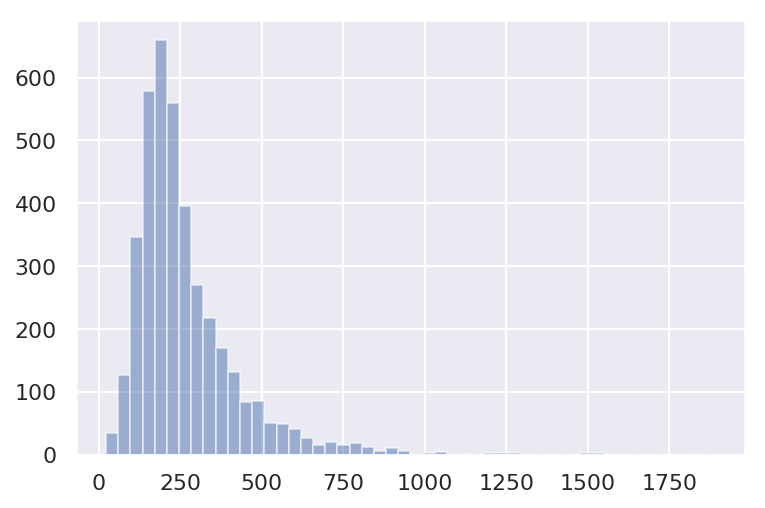

In [52]:
df_counts['ratio_fentanyl'].hist(bins=50, alpha=0.5)

In [53]:
df_counts[df_counts['ratio_fentanyl']>1000]

,city,state,sum_bene_count,sum_total_day_supply,ratio_fentanyl
444,NEWTON,KS,11,11686,1062.363636
662,COLUMBUS,IN,11,11597,1054.272727
1528,STATE COLLEGE,PA,16,24574,1535.875000
1652,JACKSON,MI,25,30844,1233.760000
1863,BARTLESVILLE,OK,14,16652,1189.428571
1913,TRENTON,NJ,12,13665,1138.750000
2170,DOYLESTOWN,PA,14,14539,1038.500000
3059,SANTA MONICA,CA,22,22421,1019.136364
3499,EUREKA,CA,13,19851,1527.000000
4005,MAUSTON,WI,11,13794,1254.000000


In [57]:
geodata['city'] = geodata['city'].apply(lambda x: x.upper())

In [103]:
geodata.head()

,latitude,longitude,county,city_state
0,40.922326,-72.637078,Suffolk,HOLTSVILLE_NY
1,40.922326,-72.637078,Suffolk,HOLTSVILLE_NY
2,18.165273,-66.722583,Adjuntas,ADJUNTAS_PR
3,18.393103,-67.180953,Aguada,AGUADA_PR
4,18.455913,-67.145780,Aguadilla,AGUADILLA_PR


In [59]:
geodata['city_state']=geodata['city'] + '_' + geodata['state']

In [62]:
geodata.head()
geodata = geodata.drop(labels=['city','state'],axis=1)

In [105]:
geodata = geodata.groupby(['city_state','county']).mean()

In [106]:
geodata.head()

,,latitude,longitude
city_state,county,,
AARONSBURG_PA,Centre,40.898690,-77.456184
ABBEVILLE_AL,Henry,31.559402,-85.222965
ABBEVILLE_GA,Wilcox,31.977048,-83.372515
ABBEVILLE_LA,Vermilion,29.989519,-92.209125
ABBEVILLE_MS,Lafayette,34.471941,-89.447507


In [63]:
df_counts['city_state']=df_counts['city'] + '_' + df_counts['state']

In [107]:
df_joined = df_counts.merge(geodata, how='right', on='city_state')

In [108]:
df_joined = df_joined.drop(labels=['city_state'],axis=1)
df_joined.head()

,city,state,sum_bene_count,sum_total_day_supply,ratio_fentanyl,latitude,longitude
0,CEDAR VALE,KS,17.0,1682.0,98.941176,37.130234,-96.444127
1,ROARING SPRING,PA,43.0,6635.0,154.302326,40.335467,-78.387541
2,WIND GAP,PA,27.0,10322.0,382.296296,40.801131,-75.310958
3,ORADELL,NJ,35.0,3112.0,88.914286,40.955347,-74.026983
4,MINDEN,NE,12.0,4401.0,366.750000,40.502515,-98.907731


In [109]:
df_joined[df_joined['city']=='FREMONT']

,city,state,sum_bene_count,sum_total_day_supply,ratio_fentanyl,latitude,longitude
1643,FREMONT,NE,29.0,12291.0,423.827586,41.527846,-96.559558
2014,FREMONT,CA,29.0,26458.0,912.344828,37.569188,-121.967686
2578,FREMONT,OH,38.0,5553.0,146.131579,41.356220,-83.133981
3615,FREMONT,MI,70.0,11140.0,159.142857,43.533884,-85.857042


In [110]:
df_joined = df_joined.dropna(axis=0)

In [111]:
df_joined.shape

(3734, 7)

In [148]:
df_joined['latitude'][df_joined['state']=='MA'].mean()

42.2668109202335

In [152]:
import folium
from ipywidgets import interact


# Aggregates data at city level for visualization
def f(state):
    state_lat = df_joined['latitude'][df_joined['state']==state].mean()
    state_long = df_joined['longitude'][df_joined['state']==state].mean()
    folium_map = folium.Map(location=[state_lat, state_long],
                            zoom_start=7,
                            tiles="CartoDB dark_matter")
    national_supply = df_joined['sum_total_day_supply'].sum()
    national_bene = df_joined['sum_bene_count'].sum()
    national_mean = national_supply/national_bene
    
    regional_supply = df_joined['sum_total_day_supply'][df_joined['state']==state].sum()
    regional_bene = df_joined['sum_bene_count'][df_joined['state']==state].sum()
    regional_mean = regional_supply/regional_bene

    for index, row in df_joined[df_joined['state']==state].iterrows():
        radius = row['ratio_fentanyl']/50
        if row['ratio_fentanyl']>national_mean:
            color="#E37222" # tangerine
        else:
            color="#0A8A9F" # teal

        popup_text = """{}, {}<br>
                    Total beneficiaries: {}<br> 
                    Total days supply: {}<br>
                    Fentanyl per beneficiary: {:.2f}<br>
                    Percent of regional mean: {:.2%}<br>
                    Percent of national mean: {:.2%}"""

        popup_text = popup_text.format(row["city"],
                                   row["state"],
                                   row["sum_bene_count"],
                                   row["sum_total_day_supply"],
                                   row["ratio_fentanyl"],
                                   row["ratio_fentanyl"]/regional_mean,
                                   row["ratio_fentanyl"]/national_mean)

        folium.CircleMarker(location=(row["latitude"],
                                      row["longitude"]),
                            radius=radius,
                            color=color,
                            fill=True,
                            popup=popup_text).add_to(folium_map)

    print ("Percent of beneficiaries above national mean (city-level aggregated): {:.2%}".format(
        df_joined['sum_bene_count'][(df_joined['state']==state)&(df_joined['ratio_fentanyl']>national_mean)].sum()/df_joined['sum_bene_count'][df_joined['state']==state].sum()
        ))
    return folium_map

print('Map of drug prescription levels in the United States, by state')
interact(f, state=sorted(df_joined['state'].unique()));

Map of drug prescription levels in the United States, by state


interactive(children=(Dropdown(description='state', options=('AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'), value='AK'), Output()), _dom_classes=('widget-interact',))